In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [3]:
df = pd.read_csv("data/wdbc.data")

In [4]:
df.head()

,ID,Diagnosis,N1_radius,N1_texture,N1_perimeter,N1_area,N1_smoothness,N1_compactness,N1_concavity,N1_concavePoints,...,N3_radius,N3_texture,N3_perimeter,N3_area,N3_smoothness,N3_compactness,N3_concavity,N3_concavePoints,N3_symmetry,N3_fractalDimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df = pd.read_csv("data/wdbc.data")

# Normalizar la matriz de datos
for col in df.columns[2:]:
    mu = np.mean(df[col])
    sigma = np.std(df[col])
    df[col] = df[col].apply(lambda x: (x-mu)/sigma)

In [73]:
df_b = pd.DataFrame()
df_m = pd.DataFrame()

In [74]:
for column in df.columns[2:]:
    m = []
    b = []
    for i in range(len(df[column])):
        if df['Diagnosis'][i] == 'M':
            m.append(df[column][i])
        else:
            b.append(df[column][i])
    df_m[column] = m
    df_b[column] = b

In [76]:
len(df_b)

357

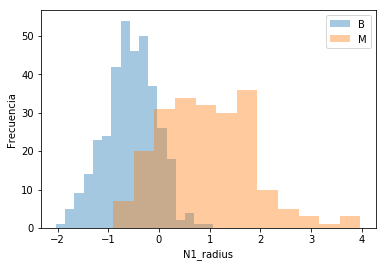

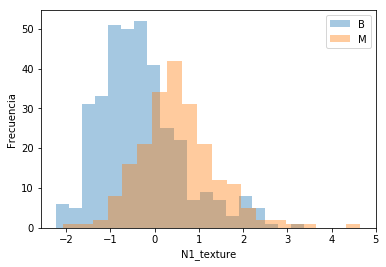

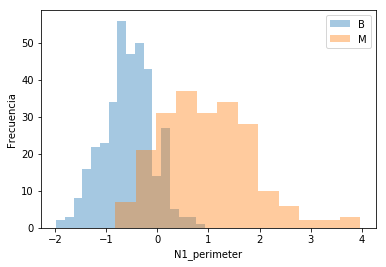

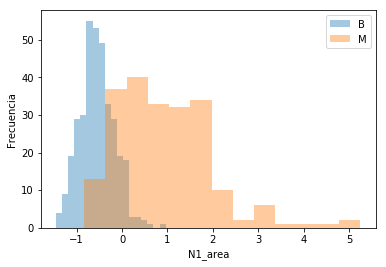

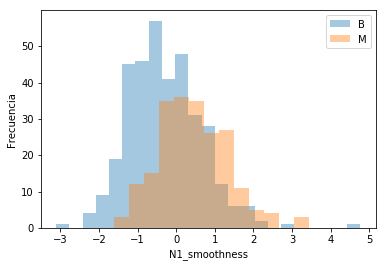

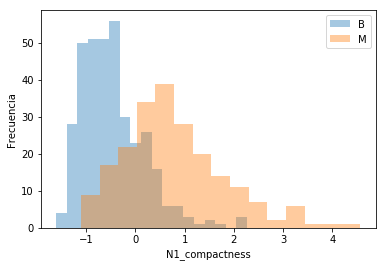

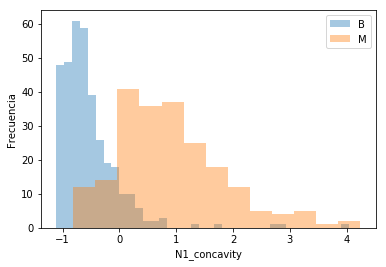

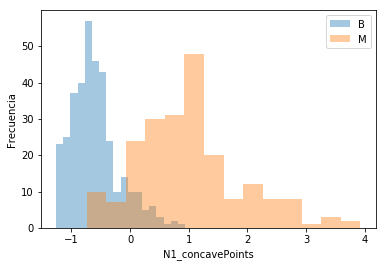

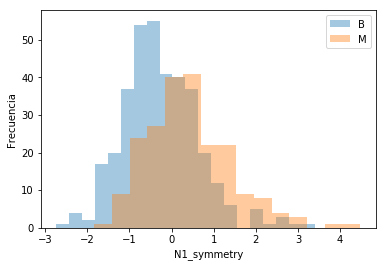

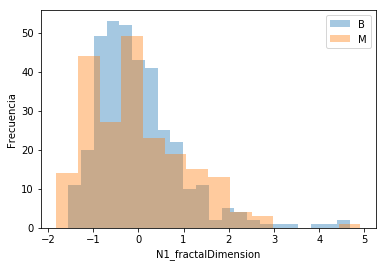

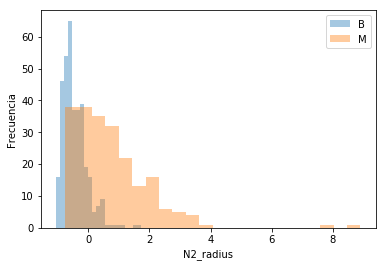

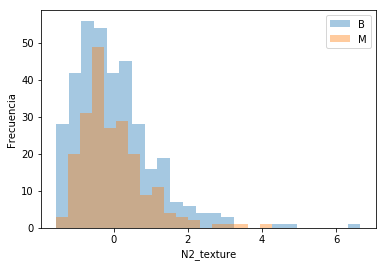

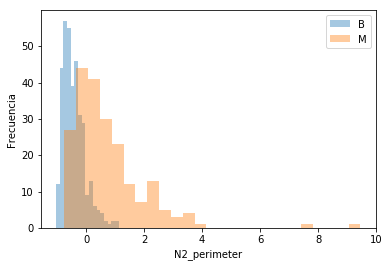

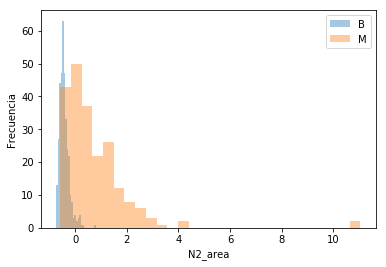

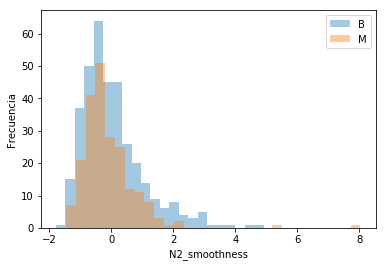

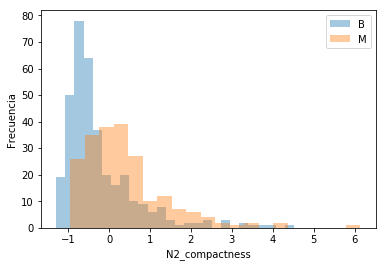

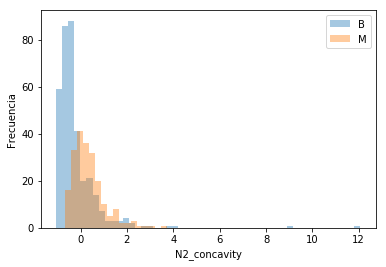

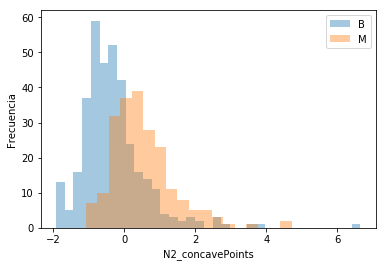

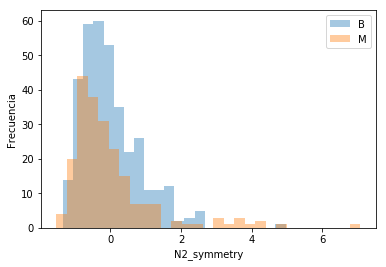

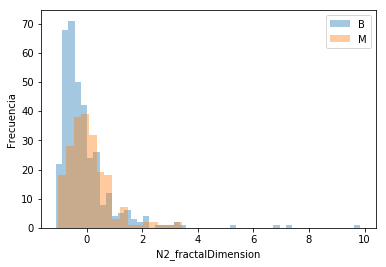

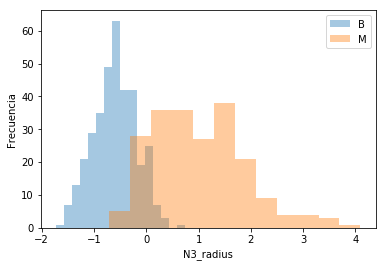

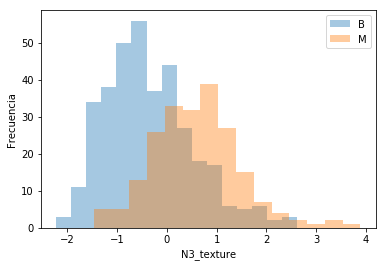

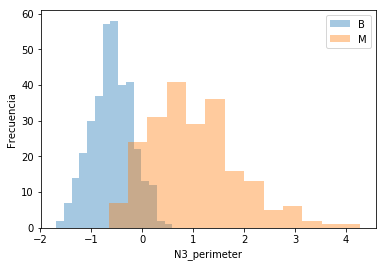

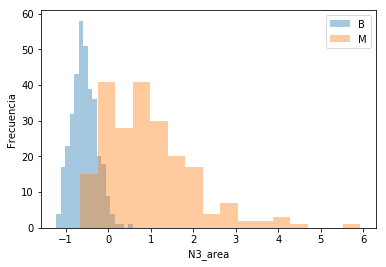

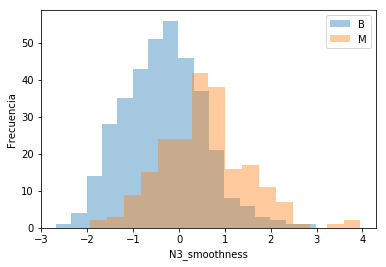

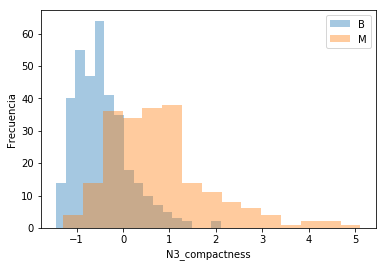

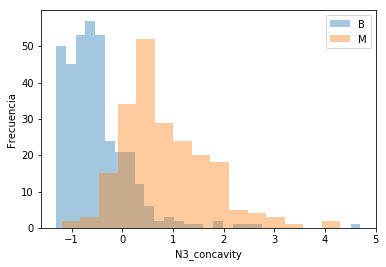

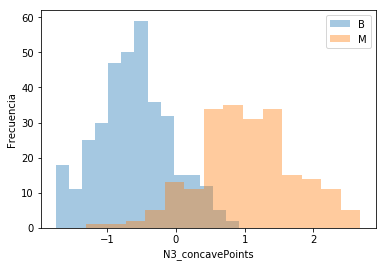

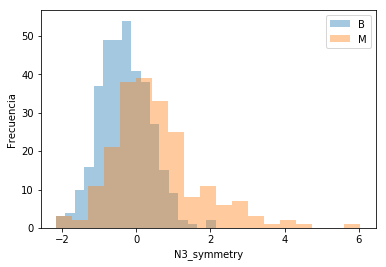

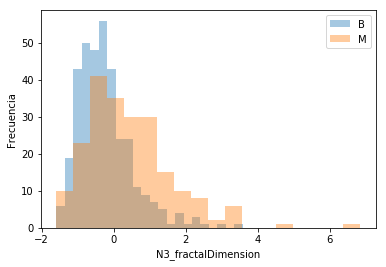

In [89]:
for col in df_b.columns:
    sns.distplot(df_b[col],kde = False, label = 'B')
    sns.distplot(df_m[col],kde = False, label = 'M')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.savefig("graphs/hist_"+col+".png", dpi = 300)
    plt.show()

(array([ 7., 20., 31., 34., 32., 30., 36., 10.,  5.,  3.,  1.,  3.]),
 array([-0.90239596, -0.49625566, -0.09011536,  0.31602494,  0.72216524,
         1.12830554,  1.53444584,  1.94058614,  2.34672644,  2.75286675,
         3.15900705,  3.56514735,  3.97128765]),
 <a list of 12 Patch objects>)

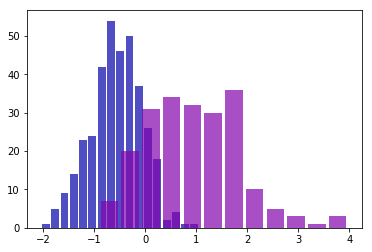

In [79]:
plt.hist(x=df_b["N1_radius"], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.hist(x=df_m["N1_radius"], bins='auto', color='#8504af',alpha=0.7, rwidth=0.85)

In [6]:
df_data = df.iloc[:, 2:]

In [7]:
pca = PCA()
X_transform = pca.fit_transform(df.iloc[:, 2:].values)
Var_C = pca.explained_variance_ratio_
C = pca.components_

In [8]:
norms = [np.linalg.norm(C[i,:]) for i in range(len(C))]
i = 0


In [153]:
np.linalg.norm(C[:,0])

1.0000000000000002

In [10]:
pca = PCA(n_components = 30)
pca.fit(df_data)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [12]:
xs = pca.transform(df_data)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(df_data)[:,1]

In [ ]:
X_transform

In [14]:
data = pd.DataFrame()
data["Componente 1"] = X_transform[:, 0]
data["Componente 2"] = X_transform[:, 1]
data["Diagnosis"] = [0 if d == 'M' else 1 for d in df["Diagnosis"]]

In [54]:
sum(Var_C[:5])

0.8473427431680725

In [46]:
for i in range(10,20):
    print(i)

10
11
12
13
14
15
16
17
18
19


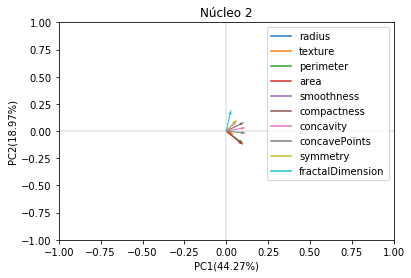

In [92]:


# Plot de vectores
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
plt.quiver(0, 0, xvector[0:10]*max(xs), yvector[0:10]*max(ys), color=colors, width = 0.003)
#for i in range(0,10):
#    plt.arrow(0,0, xvector[i]*max(xs), yvector[i]*max(ys), color = colors[i], width = 0.005, head_width = 0.09)

legends = []
for s, color in zip(df.columns[2:12], colors):
    legends.append(mlines.Line2D([], [], color=color, label=s[3:]))
plt.legend(handles=legends)
#sns.scatterplot(x="Componente 1", y="Componente 2",
#               data=data, alpha=0.06, hue="Diagnosis",
#                legend=False)
# for s, coors in zip(df.columns[2:], C[:2, :].T):
#     plt.annotate(s, coors)
plt.axhline(0, color="tab:grey", alpha=0.2)
plt.axvline(0, color="tab:grey", alpha=0.2)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1(44.27%)')
plt.ylabel('PC2(18.97%)')
plt.title('Núcleo 2')
plt.savefig("graphs/quiverr_2.png", dpi = 300)
plt.show()

In [55]:
# Creacion de DataFrame con dos componentes y score a 1 y 2 componentes
norms = np.array([np.linalg.norm(row) for row in df.iloc[:, 2:].values])
score_1cmpt = (X_transform[:, 0]/norms)**2
norms2 = np.apply_along_axis(np.linalg.norm, 1, X_transform[:, :2])
score_2cmpt = (norms2 / norms) ** 2

df_transform = df.iloc[:, :2].copy()
df_transform["Componente 0"] = X_transform[:, 0]
df_transform["Componente 1"] = X_transform[:, 1]
df_transform["Score 1"] = score_1cmpt
df_transform["Score 2"] = score_2cmpt
df_transform["Diagnosis con CA"] = np.where(df_transform["Diagnosis"] == "M",
                                            -df_transform["Score 2"],
                                            df_transform["Score 2"])

* 6 = N1_concavity
* 7 = N1_concavePoints
* 9 = n1_fractalDimension
* 11 = n2_texture
* 14 n2_smoothness
* 27 = n3_concavePoints

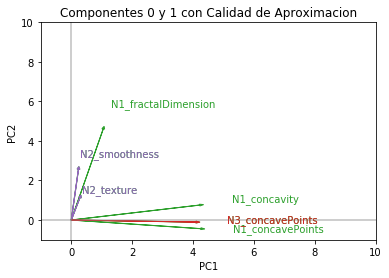

In [130]:
index_n1 = [6,7,9,11,14,27]
index_n2 = [11,14]
index_n3 = [27]
#palette = sns.diverging_palette(220, 20, as_cmap=True)
plt.title("Componentes 0 y 1 con Calidad de Aproximacion")
plt.axhline(0, color="tab:grey", alpha=0.5)
plt.axvline(0, color="tab:grey", alpha=0.5)
#sns.scatterplot(x="Componente 1", y="Componente 2",
#                data=data, alpha=0.08, hue="Diagnosis",
#                legend=False)
#plt.arrow(0,0, xvector[i]*max(xs), yvector[i]*max(ys), color = 'b', width = 0.000000005, head_width = 0.0025)
#plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2, list(df_data.columns.values)[i], color='b')
plt.xlim(-1,10)
plt.ylim(-1,10)
plt.ylabel('PC2')
plt.xlabel('PC1')

for i in index_n1:
    plt.arrow(0,0, xvector[i]*max(xs), yvector[i]*max(ys), color = 'C2', width = 0.005, head_width = 0.09)
    plt.text(xvector[i]*max(xs)*1.25, yvector[i]*max(ys)*1.25, list(df_data.columns.values)[i], color='C2')
    
for i in index_n2:
    plt.arrow(0,0, xvector[i]*max(xs), yvector[i]*max(ys), color = 'C4', width = 0.005, head_width = 0.09)
    plt.text(xvector[i]*max(xs)*1.25, yvector[i]*max(ys)*1.25, list(df_data.columns.values)[i], color='C4')
    
for i in index_n3:
    plt.arrow(0,0, xvector[i]*max(xs), yvector[i]*max(ys), color = 'C3', width = 0.005, head_width = 0.09)
    plt.text(xvector[i]*max(xs)*1.25, yvector[i]*max(ys)*1.25, list(df_data.columns.values)[i], color='C3')

#plt.show()
plt.savefig("graphs/vectors.png", dpi = 400)
#plt.ylim([0, 1.1])
#plt.xlim(-10,10)



In [ ]:
df.columns

In [ ]:
cov = df.iloc[:, 2:].corr()

mask = np.zeros_like(cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(cov, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0,
            linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=10, yticklabels=10)
#plt.savefig("graphs/cov", dpi=900)
#plt.clf()

In [ ]:
sns.pairplot(df, hue="Diagnosis", vars = ["N3_concavity", "N3_compactness", "N3_fractalDimension", "N3_smoothness"])
plt.savefig("graphs/scatter_others_n3.png", dpi = 300)
#plt.clf()

In [ ]:
cov = df.iloc[:, 2:].corr()
cov_1 = cov[10:20].iloc[:, 10:20]
cmap = sns.diverging_palette(10, 220, as_cmap=True)
mask_1 = np.zeros_like(cov_1, dtype=np.bool)
mask_1[np.triu_indices_from(mask_1)] = True

N1 - N1
concavity -- compactness
concavePoints -- radius
smoothness -- compactness

N2 - N2
N2_fractalDimension -- N2_compactness
N2_concavity -- N2_compactness
N2_fractalDimension -- N2_concavity

N3 - N3
fractalDimension -- compactness
fractalDimension -- smoothness
compactness -- concavity

In [ ]:
sns.heatmap(cov_1, cmap = cmap, cbar_kws={"shrink": .5}, mask = mask_1, vmin=-1.0, vmax=1.0)

In [ ]:
sns.heatmap(cov[11:20].iloc[:,11:20], cmap = cmap, cbar_kws={"shrink": .5})

In [ ]:
sns.heatmap(cov[:10].iloc[:,:10], cmap = cmap, cbar_kws={"shrink": .5})

In [ ]:
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(cov, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0,
            linewidths=.5, cbar_kws={"shrink": .5},
            xticklabels=10, yticklabels=10)
#plt.savefig("graphs/cov", dpi=900)
#plt.clf()

In [ ]:
# Analisis en componentes principales
pca = PCA()
X_transform = pca.fit_transform(df.iloc[:, 2:].values)
Var_C = pca.explained_variance_ratio_
C = pca.components_

In [ ]:
Var_C

In [ ]:
# Grafica de varianza acumulada
plt.title("Varianza por componente")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 0.5])
plt.plot(range(30), Var_C, "-o")
plt.vlines(range(30), 0, Var_C, "tab:orange")
#plt.savefig("graphs/varianza_cmpt.png")
#plt.clf()

In [ ]:
var_acumulada = []
aux = 0
for i in range(len(Var_C)):
    var_acumulada.append(aux+Var_C[i])
    aux = var_acumulada[i]

In [ ]:
plt.title("Varianza acumulada")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 1.1])
plt.plot(range(30), var_acumulada, "-o")
#plt.vlines(range(30), 0, var_acumulada, "tab:orange")
plt.savefig("graphs/varianza_acum.png", dpi = 250)
#plt.clf()

In [66]:
# Creacion de DataFrame con dos componentes y score a 1 y 2 componentes
norms = np.array([np.linalg.norm(row) for row in df.iloc[:, 2:].values])
score_1cmpt = (X_transform[:, 0]/norms)**2
norms2 = np.apply_along_axis(np.linalg.norm, 1, X_transform[:, :2])
score_2cmpt = (norms2 / norms) ** 2

df_transform = df.iloc[:, :2].copy()
df_transform["Componente 0"] = X_transform[:, 0]
df_transform["Componente 1"] = X_transform[:, 1]
df_transform["Componente 2"] = X_transform[:, 2]
df_transform["Score 1"] = score_1cmpt
df_transform["Score 2"] = score_2cmpt
df_transform["Diagnosis con CA"] = np.where(df_transform["Diagnosis"] == "M",
                                            -df_transform["Score 2"],
                                            df_transform["Score 2"])

In [ ]:
# Grafica Scatter de Componente 0 contra Score 1
plt.title("Componente 1 con calidad de aproximación")
plt.axhline(0, color="tab:grey", alpha=0.5)
plt.axvline(0, color="tab:grey", alpha=0.5)
sns.scatterplot(x="Componente 0", y="Score 1", data=df_transform,
                hue="Diagnosis", alpha=0.5)
plt.xlabel("Componente 1 (44.2%)")
plt.savefig("graphs/cmpt0_score1", dpi = 250)
#plt.clf()

In [ ]:
# Grafica departicipacion de variables en componentes
plt.title("Participación de variables originales en componentes")
cmap = sns.diverging_palette(10, 240, n=40, as_cmap=True)
sns.heatmap(C, cmap=cmap, vmin=-1, vmax=1, xticklabels = False)
plt.xlabel("Variables")
plt.ylabel("Componentes")
plt.savefig("graphs/participacion_vars_cmpt.png", dpi = 250)
#plt.clf()

Text(0, 0.5, 'Componente 2 (19 %)')

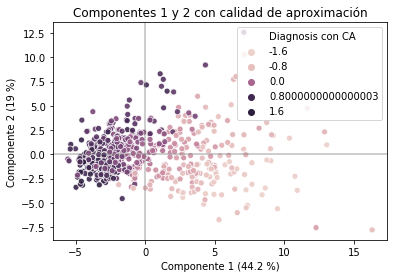

In [57]:
# Grafica a 2 Componentes
palette = sns.diverging_palette(220, 28, as_cmap=True)
plt.title("Componentes 1 y 2 con calidad de aproximación")
plt.axhline(0, color="tab:grey", alpha=0.5)
plt.axvline(0, color="tab:grey", alpha=0.5)
sns.scatterplot(x="Componente 0", y="Componente 1",
                data=df_transform, alpha=0.9, hue="Diagnosis con CA")
plt.xlabel("Componente 1 (44.2 %)")
plt.ylabel("Componente 2 (19 %)")
#plt.savefig("graphs/cmpt0_cmpt1")
#plt.clf()

Text(0, 0.5, 'Componente 2 (19 %)')

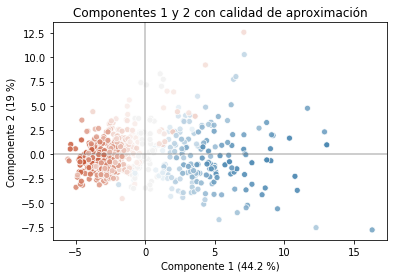

In [65]:
# Grafica a 2 Componentes
palette = sns.diverging_palette(h_neg = 240, h_pos = 20, s = 80, as_cmap=True)
plt.title("Componentes 1 y 2 con calidad de aproximación")
plt.axhline(0, color="tab:grey", alpha=0.5)
plt.axvline(0, color="tab:grey", alpha=0.5)
sns.scatterplot(x="Componente 0", y="Componente 1",
                data=df_transform, alpha=0.9, hue="Diagnosis con CA",
                palette = palette, legend=False)
plt.xlabel("Componente 1 (44.2 %)")
plt.ylabel("Componente 2 (19 %)")
#plt.savefig("graphs/cmpt0_cmpt1_2", dpi = 250)
#plt.clf()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/wdbc.data")

# Normalizar la matriz de datos
for col in df.columns[2:]:
    mu = np.mean(df[col])
    sigma = np.std(df[col])
    df[col] = df[col].apply(lambda x: (x-mu)/sigma)

# Scatter Matrix por nucleo de cada variable
sns.pairplot(df, hue="Diagnosis", vars=list(df)[2:12])
plt.savefig("graphs/scatter_matrix_n1.png")
plt.clf()

sns.pairplot(df, hue="Diagnosis", vars=list(df)[12:22])
plt.savefig("graphs/scatter_matrix_n2.png")
plt.clf()

sns.pairplot(df, hue="Diagnosis", vars=list(df)[22:32])
plt.savefig("graphs/scatter_matrix_n3.png")
plt.clf()

# Scatter Matrix por variable de cada nucleo
for i in range(2, 12):
    sns.pairplot(df, hue="Diagnosis", vars=list(df)[i::10])
    plt.savefig("graphs/scatter_matrix_v" + str(i - 1) + ".png")
    plt.clf()

# Analisis en componentes principales
pca = PCA()
X_transform = pca.fit_transform(df.iloc[:, 2:].values)
Var_C = pca.explained_variance_ratio_
C = pca.components_

# Grafica departicipacion de variables en componentes
plt.title("Participacion de Variables en Componentes")
cmap = sns.diverging_palette(10, 240, n=40, as_cmap=True)
sns.heatmap(C, cmap=cmap, vmin=-1, vmax=1)
plt.xlabel("Variables")
plt.ylabel("Componentes")
plt.savefig("graphs/participacion_vars_cmpt.png")
plt.clf()

# Grafica de varianza acumulada
plt.title("Varianza por Componente")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 0.5])
plt.plot(range(30), Var_C, "-o")
plt.vlines(range(30), 0, Var_C, "tab:orange")
plt.savefig("graphs/varianza_cmpt.png")
plt.clf()

# Creacion de DataFrame con dos componentes y score a 1 y 2 componentes
norms = np.array([np.linalg.norm(row) for row in df.iloc[:, 2:].values])
score_1cmpt = (X_transform[:, 0]/norms)**2
norms2 = np.apply_along_axis(np.linalg.norm, 1, X_transform[:, :2])
score_2cmpt = (norms2 / norms) ** 2

df_transform = df.iloc[:, :2].copy()
df_transform["Componente 0"] = X_transform[:, 0]
df_transform["Componente 1"] = X_transform[:, 1]
df_transform["Score 1"] = score_1cmpt
df_transform["Score 2"] = score_2cmpt
df_transform["Diagnosis con CA"] = np.where(df_transform["Diagnosis"] == "M",
                                            -df_transform["Score 2"],
                                            df_transform["Score 2"])

# Grafica Scatter de Componente 0 contra Score 1
plt.title("Componente 0 con calidad de aproximación")
plt.axhline(0, color="tab:grey", alpha=0.5)
plt.axvline(0, color="tab:grey", alpha=0.5)
sns.scatterplot(x="Componente 0 ()", y="Score 1", data=df_transform,
                hue="Diagnosis", alpha=0.5)
plt.savefig("graphs/cmpt0_score1")
plt.clf()

# Grafica a 2 Componentes
palette = sns.diverging_palette(220, 28, s=100, b=100, as_cmap=True)
plt.title("Componentes 0 y 1 con Calidad de Aproximacion")
plt.axhline(0, color="tab:grey", alpha=0.5)
plt.axvline(0, color="tab:grey", alpha=0.5)
sns.scatterplot(x="Componente 0", y="Componente 1",
                data=df_transform, alpha=0.9,
                palette=palette, hue="Diagnosis con CA",
                legend=False)
plt.savefig("graphs/cmpt0_cmpt1")
plt.clf()
